In [11]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### pandas中的三种基本结构：
Series:一维
DataFrame：二维
Panel

In [12]:
s = pd.Series([1, 3, 5,np.nan, 6, 8 ])
print(s)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


###### NaN(not a number)，在数学表示上表示一个无法表示的数，一般为非浮点数（比如无理数）

###### inf 是一个超过浮点表示范围的浮点数，仍是一个数但可能因无穷大而无法显示

空值在python中的四种表现：
None
False
""
NaN
前三种可以直接用"="来判断


######  DataFrame

In [5]:
import pandas as pd
import numpy as np
dates = pd.date_range('20130101', periods = 6)
print(dates)

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')


In [6]:
df = pd.DataFrame(np.random.randn(6,4), index = dates, columns = list('ABCD'))
df

,A,B,C,D
2013-01-01,1.146409,-0.933208,0.836147,-1.116172
2013-01-02,-1.630891,1.105546,1.478511,-0.966324
2013-01-03,-0.362320,1.693848,0.087635,-1.387981
2013-01-04,1.705577,0.455459,0.802821,1.222696
2013-01-05,0.199537,-2.332924,0.342048,0.994240
2013-01-06,-1.865843,-0.169212,-0.692328,-1.754281


In [7]:
df2 = pd.DataFrame({'A': 1.,
                   'B': pd.Timestamp('20130102'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [17]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

##### 查看数据

head/tail分别查看最前面几行和最后面几行（默认为5）

In [18]:
df.head()

,A,B,C,D
2013-01-01,-1.184304,0.355332,-1.285800,0.072290
2013-01-02,-0.520320,1.667427,-0.273361,-0.721531
2013-01-03,0.742764,-1.575026,-0.303517,-1.251064
2013-01-04,-0.299709,-0.542112,1.280206,0.300768
2013-01-05,0.291174,0.101058,-1.057906,-0.463199


In [19]:
df.tail(3)

,A,B,C,D
2013-01-04,-0.299709,-0.542112,1.280206,0.300768
2013-01-05,0.291174,0.101058,-1.057906,-0.463199
2013-01-06,0.680996,0.453097,-0.068356,-0.904589


###### 查看下标：index

In [20]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

###### 查看列标：columns

In [21]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

######  查看数据值： values

In [22]:
df.values

array([[-1.1843043 ,  0.35533154, -1.28579974,  0.07229007],
       [-0.52031977,  1.6674272 , -0.27336052, -0.72153087],
       [ 0.74276395, -1.57502636, -0.30351677, -1.25106425],
       [-0.29970884, -0.54211157,  1.2802061 ,  0.30076849],
       [ 0.29117351,  0.10105754, -1.05790573, -0.46319898],
       [ 0.68099623,  0.45309669, -0.06835555, -0.90458904]])

######  描述统计

In [23]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.048233,0.076629,-0.284789,-0.494554
std,0.754906,1.082723,0.905126,0.591065
min,-1.184304,-1.575026,-1.285800,-1.251064
25%,-0.465167,-0.381319,-0.869308,-0.858824
50%,-0.004268,0.228195,-0.288439,-0.592365
75%,0.583541,0.428655,-0.119607,-0.061582
max,0.742764,1.667427,1.280206,0.300768


######  转置

In [24]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,-1.184304,-0.520320,0.742764,-0.299709,0.291174,0.680996
B,0.355332,1.667427,-1.575026,-0.542112,0.101058,0.453097
C,-1.285800,-0.273361,-0.303517,1.280206,-1.057906,-0.068356
D,0.072290,-0.721531,-1.251064,0.300768,-0.463199,-0.904589


##### 排序
sort_index(axis = 0, ascending = True) axis = 0表示按第0维进行排序

In [26]:
df.sort_index(ascending = False)

,A,B,C,D
2013-01-06,0.680996,0.453097,-0.068356,-0.904589
2013-01-05,0.291174,0.101058,-1.057906,-0.463199
2013-01-04,-0.299709,-0.542112,1.280206,0.300768
2013-01-03,0.742764,-1.575026,-0.303517,-1.251064
2013-01-02,-0.520320,1.667427,-0.273361,-0.721531
2013-01-01,-1.184304,0.355332,-1.285800,0.072290


In [27]:
df.sort_index(axis = 1,ascending = False)

,D,C,B,A
2013-01-01,0.072290,-1.285800,0.355332,-1.184304
2013-01-02,-0.721531,-0.273361,1.667427,-0.520320
2013-01-03,-1.251064,-0.303517,-1.575026,0.742764
2013-01-04,0.300768,1.280206,-0.542112,-0.299709
2013-01-05,-0.463199,-1.057906,0.101058,0.291174
2013-01-06,-0.904589,-0.068356,0.453097,0.680996


In [28]:
df.sort_index(axis = 1,ascending = False)

,D,C,B,A
2013-01-01,0.072290,-1.285800,0.355332,-1.184304
2013-01-02,-0.721531,-0.273361,1.667427,-0.520320
2013-01-03,-1.251064,-0.303517,-1.575026,0.742764
2013-01-04,0.300768,1.280206,-0.542112,-0.299709
2013-01-05,-0.463199,-1.057906,0.101058,0.291174
2013-01-06,-0.904589,-0.068356,0.453097,0.680996


In [29]:
df.sort_values(by = 'B')

,A,B,C,D
2013-01-03,0.742764,-1.575026,-0.303517,-1.251064
2013-01-04,-0.299709,-0.542112,1.280206,0.300768
2013-01-05,0.291174,0.101058,-1.057906,-0.463199
2013-01-01,-1.184304,0.355332,-1.285800,0.072290
2013-01-06,0.680996,0.453097,-0.068356,-0.904589
2013-01-02,-0.520320,1.667427,-0.273361,-0.721531


##### 索引
DataFrame支持Python/Numpy索引语法
推荐使用：.at, .iat, .loc, .iloc, .ix

###### 读取数据

In [30]:
df["A"]

2013-01-01   -1.184304
2013-01-02   -0.520320
2013-01-03    0.742764
2013-01-04   -0.299709
2013-01-05    0.291174
2013-01-06    0.680996
Freq: D, Name: A, dtype: float64

In [31]:
df.A

2013-01-01   -1.184304
2013-01-02   -0.520320
2013-01-03    0.742764
2013-01-04   -0.299709
2013-01-05    0.291174
2013-01-06    0.680996
Freq: D, Name: A, dtype: float64

In [32]:
df[0:3]

,A,B,C,D
2013-01-01,-1.184304,0.355332,-1.285800,0.072290
2013-01-02,-0.520320,1.667427,-0.273361,-0.721531
2013-01-03,0.742764,-1.575026,-0.303517,-1.251064


In [33]:
df["20130101":"20130103"]

,A,B,C,D
2013-01-01,-1.184304,0.355332,-1.285800,0.072290
2013-01-02,-0.520320,1.667427,-0.273361,-0.721531
2013-01-03,0.742764,-1.575026,-0.303517,-1.251064


In [34]:
df.loc[dates[0]]

A   -1.184304
B    0.355332
C   -1.285800
D    0.072290
Name: 2013-01-01 00:00:00, dtype: float64

In [35]:
df.loc[:,['A','B']]

,A,B
2013-01-01,-1.184304,0.355332
2013-01-02,-0.520320,1.667427
2013-01-03,0.742764,-1.575026
2013-01-04,-0.299709,-0.542112
2013-01-05,0.291174,0.101058
2013-01-06,0.680996,0.453097


In [37]:
df.loc['20130102':'20130104',['A','D']]

,A,D
2013-01-02,-0.520320,-0.721531
2013-01-03,0.742764,-1.251064
2013-01-04,-0.299709,0.300768


In [39]:
df.loc['20130102',['A','B']]

A   -0.520320
B    1.667427
Name: 2013-01-02 00:00:00, dtype: float64

In [40]:
df.loc[dates[0],'B']

0.35533153667121592

In [41]:
%timeit -n100 df.loc[dates[0],'B']
%timeit -n100 df.at[dates[0],'B']

print(df.at[dates[0],'B'])

100 loops, best of 3: 922 µs per loop
100 loops, best of 3: 77.9 µs per loop
0.355331536671


In [42]:
df.iloc[3]

A   -0.299709
B   -0.542112
C    1.280206
D    0.300768
Name: 2013-01-04 00:00:00, dtype: float64

In [43]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-0.299709,-0.542112
2013-01-05,0.291174,0.101058


In [44]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,-0.520320,-0.273361
2013-01-03,0.742764,-0.303517
2013-01-05,0.291174,-1.057906


In [45]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,-0.520320,1.667427,-0.273361,-0.721531
2013-01-03,0.742764,-1.575026,-0.303517,-1.251064


In [46]:
df.iloc[:,1:3]

,B,C
2013-01-01,0.355332,-1.285800
2013-01-02,1.667427,-0.273361
2013-01-03,-1.575026,-0.303517
2013-01-04,-0.542112,1.280206
2013-01-05,0.101058,-1.057906
2013-01-06,0.453097,-0.068356


######  标量值：

In [47]:
df.iloc[1,1]

1.6674272043933436

In [48]:
%timeit -n100 df.iloc[1,1]
%timeit -n100 df.iat[1,1]

df.iat[1,1]

100 loops, best of 3: 797 µs per loop
100 loops, best of 3: 37.2 µs per loop


1.6674272043933436

In [49]:
df[df.A > 0]

,A,B,C,D
2013-01-03,0.742764,-1.575026,-0.303517,-1.251064
2013-01-05,0.291174,0.101058,-1.057906,-0.463199
2013-01-06,0.680996,0.453097,-0.068356,-0.904589


In [50]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,0.355332,NaN,0.072290
2013-01-02,NaN,1.667427,NaN,NaN
2013-01-03,0.742764,NaN,NaN,NaN
2013-01-04,NaN,NaN,1.280206,0.300768
2013-01-05,0.291174,0.101058,NaN,NaN
2013-01-06,0.680996,0.453097,NaN,NaN


######   使用isin方法做filter过滤

In [51]:
df2 = df.copy()
df2['E'] = ['one', 'one','two','three','four','three']

df2

,A,B,C,D,E
2013-01-01,-1.184304,0.355332,-1.285800,0.072290,one
2013-01-02,-0.520320,1.667427,-0.273361,-0.721531,one
2013-01-03,0.742764,-1.575026,-0.303517,-1.251064,two
2013-01-04,-0.299709,-0.542112,1.280206,0.300768,three
2013-01-05,0.291174,0.101058,-1.057906,-0.463199,four
2013-01-06,0.680996,0.453097,-0.068356,-0.904589,three


In [52]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,0.742764,-1.575026,-0.303517,-1.251064,two
2013-01-05,0.291174,0.101058,-1.057906,-0.463199,four


In [54]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index = pd.date_range('20130102',periods = 6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [55]:
df['F'] = s1
df

,A,B,C,D,F
2013-01-01,-1.184304,0.355332,-1.285800,0.072290,NaN
2013-01-02,-0.520320,1.667427,-0.273361,-0.721531,1.0
2013-01-03,0.742764,-1.575026,-0.303517,-1.251064,2.0
2013-01-04,-0.299709,-0.542112,1.280206,0.300768,3.0
2013-01-05,0.291174,0.101058,-1.057906,-0.463199,4.0
2013-01-06,0.680996,0.453097,-0.068356,-0.904589,5.0


###### 使用at 或者iat 修改单个值

In [56]:
df.at[dates[0],'A'] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.355332,-1.285800,0.072290,NaN
2013-01-02,-0.520320,1.667427,-0.273361,-0.721531,1.0
2013-01-03,0.742764,-1.575026,-0.303517,-1.251064,2.0
2013-01-04,-0.299709,-0.542112,1.280206,0.300768,3.0
2013-01-05,0.291174,0.101058,-1.057906,-0.463199,4.0
2013-01-06,0.680996,0.453097,-0.068356,-0.904589,5.0


In [57]:
df.iat[0, 1] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.285800,0.072290,NaN
2013-01-02,-0.520320,1.667427,-0.273361,-0.721531,1.0
2013-01-03,0.742764,-1.575026,-0.303517,-1.251064,2.0
2013-01-04,-0.299709,-0.542112,1.280206,0.300768,3.0
2013-01-05,0.291174,0.101058,-1.057906,-0.463199,4.0
2013-01-06,0.680996,0.453097,-0.068356,-0.904589,5.0


######  设定一整列：

In [58]:
df.loc[:,'D'] = np.array([5] * len(df))
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.285800,5,NaN
2013-01-02,-0.520320,1.667427,-0.273361,5,1.0
2013-01-03,0.742764,-1.575026,-0.303517,5,2.0
2013-01-04,-0.299709,-0.542112,1.280206,5,3.0
2013-01-05,0.291174,0.101058,-1.057906,5,4.0
2013-01-06,0.680996,0.453097,-0.068356,5,5.0


In [59]:
df.loc[:,'D'] = np.array([5] * len(df))
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.285800,5,NaN
2013-01-02,-0.520320,1.667427,-0.273361,5,1.0
2013-01-03,0.742764,-1.575026,-0.303517,5,2.0
2013-01-04,-0.299709,-0.542112,1.280206,5,3.0
2013-01-05,0.291174,0.101058,-1.057906,5,4.0
2013-01-06,0.680996,0.453097,-0.068356,5,5.0


In [60]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.285800,-5,NaN
2013-01-02,-0.520320,-1.667427,-0.273361,-5,-1.0
2013-01-03,-0.742764,-1.575026,-0.303517,-5,-2.0
2013-01-04,-0.299709,-0.542112,-1.280206,-5,-3.0
2013-01-05,-0.291174,-0.101058,-1.057906,-5,-4.0
2013-01-06,-0.680996,-0.453097,-0.068356,-5,-5.0


##### 缺失数据

In [62]:
df1 = df.reindex(index = dates[0:4], columns = list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E'] = 1

df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-1.285800,5,NaN,1.0
2013-01-02,-0.520320,1.667427,-0.273361,5,1.0,1.0
2013-01-03,0.742764,-1.575026,-0.303517,5,2.0,NaN
2013-01-04,-0.299709,-0.542112,1.280206,5,3.0,NaN


###### 丢失所有缺失数据的行得到新的数据

In [63]:
df1.dropna(how = 'any')

,A,B,C,D,F,E
2013-01-02,-0.52032,1.667427,-0.273361,5,1.0,1.0


###### 填充缺失数据

In [65]:
df1.fillna(value = 5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-1.285800,5,5.0,1.0
2013-01-02,-0.520320,1.667427,-0.273361,5,1.0,1.0
2013-01-03,0.742764,-1.575026,-0.303517,5,2.0,5.0
2013-01-04,-0.299709,-0.542112,1.280206,5,3.0,5.0


######  检查缺失数据的位置

In [68]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


In [69]:
df.mean()#每列的均值

A    0.268597
B    0.188991
C    0.303578
D   -0.096756
dtype: float64

In [70]:
df.mean(1)#每行的均值

2013-01-01    0.308858
2013-01-02    0.056405
2013-01-03    1.584381
2013-01-04    0.540972
2013-01-05   -1.179050
2013-01-06   -0.314952
Freq: D, dtype: float64

###### 多个对象之间的操作，如果维度不对，pandas 会自动调用 broadcasting 机制： shift()用来做对齐操作

In [96]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index = dates).shift(3)
print(s)

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    NaN
2013-01-04    1.0
2013-01-05    3.0
2013-01-06    5.0
Freq: D, dtype: float64


In [72]:
len(s)

6

In [97]:
s2 = pd.Series([1,3,5,6,8,np.nan], index = dates).shift(0)
print(s2)

2013-01-01    1.0
2013-01-02    3.0
2013-01-03    5.0
2013-01-04    6.0
2013-01-05    8.0
2013-01-06    NaN
Freq: D, dtype: float64


###### 相减 :df - s

In [75]:
df.sub(s, axis = 'index')

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,2.011306,1.275615,-1.201939,0.252543
2013-01-04,-2.559886,-2.810385,-1.756315,-2.709525
2013-01-05,-5.110811,-6.358570,-6.699000,-6.547818
2013-01-06,NaN,NaN,NaN,NaN


##### apply操作

######  numpy.cumsum(a, axis=None, dtype=None, out=None)
axis=0，按照行累加。
axis=1，按照列累加。
axis不给定具体值，就把numpy数组当成一个一维数组。


In [76]:
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,-0.943845,1.133166,1.121944,-0.075833
2013-01-02,-0.281000,1.273023,1.562629,-1.093598
2013-01-03,2.730306,3.548638,1.360690,0.158944
2013-01-04,3.170421,3.738253,2.604375,0.449419
2013-01-05,3.059610,2.379683,0.905375,-1.098399
2013-01-06,1.611585,1.133945,1.821465,-0.580535


###### 求每列最大值最小值之差

In [77]:
df.apply(lambda x: x.max() - x.min())

A    4.459331
B    3.634185
C    2.942684
D    2.800361
dtype: float64

##### 绘制直方图

In [79]:
s = pd.Series(np.random.randint(0, 7, size = 10))
print(s)

0    5
1    2
2    6
3    0
4    5
5    4
6    2
7    5
8    6
9    1
dtype: int32


In [80]:
print(s.value_counts())

5    3
6    2
2    2
4    1
1    1
0    1
dtype: int64


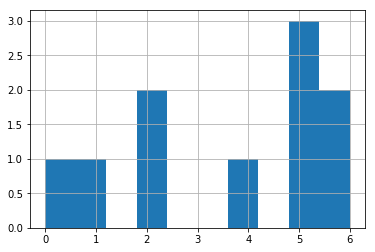

In [81]:
h = s.hist()

##### 字符串方法

当 Series 或者 DataFrame 的某一列是字符串时，我们可以用 .str 对这个字符串数组进行字符串的基本操作

Series.str.lower() 全部小写
Series.str.capitalize() 首字母大写
Series.str.upper() 全部大写
Series.str.swapcase() 大小写反转

In [82]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
print(s.str.lower())

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object


##### 合并

######  连接

In [83]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.094013,-0.107319,-0.361465,1.031313
1,0.654741,0.504514,-0.898981,-1.052048
2,-0.973405,-0.235625,0.992452,0.069436
3,-0.839987,0.627787,-1.087574,-0.866771
4,-0.366811,-0.535748,0.279995,0.749724
5,0.029577,-1.027112,-0.299220,-1.516014
6,0.574276,-1.983542,0.523656,0.048897
7,0.304904,-1.279796,1.138827,-1.357893
8,-0.816148,-0.104566,1.070541,0.730847
9,-1.109339,1.036658,-1.531314,0.885323


###### pd.comcat函数可以将多个pandas对象连接

In [84]:
pieces = [df[:2], df[4:5], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,0.094013,-0.107319,-0.361465,1.031313
1,0.654741,0.504514,-0.898981,-1.052048
4,-0.366811,-0.535748,0.279995,0.749724
7,0.304904,-1.279796,1.138827,-1.357893
8,-0.816148,-0.104566,1.070541,0.730847
9,-1.109339,1.036658,-1.531314,0.885323


###### 数据库中的Join

In [85]:
left = pd.DataFrame({'key':['foo','foo'], 'lval':[1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
print(left)
print(right)

   key  lval
0  foo     1
1  foo     2
   key  rval
0  foo     4
1  foo     5


In [86]:
pd.merge(left, right, on = 'key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


##### 向DataFrame中添加行

In [44]:
df = pd.DataFrame(np.random.randn(8, 4), columns = ['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,-1.081128,0.707921,-0.700601,-1.189770
1,2.326023,0.092043,1.829562,-2.012632
2,0.993256,0.197760,-0.150218,-0.276718
3,-1.208984,0.012035,-2.047390,0.103579
4,-0.621803,0.738494,-0.219866,-0.289329
5,-0.017157,-0.038615,-0.431585,1.494260
6,0.476415,0.174877,0.536476,1.023144
7,0.157019,0.975510,-0.165540,0.464149


###### 将第三行的值添加到最后一行

In [88]:
s = df.iloc[3]
df.append(s, ignore_index = True)

,A,B,C,D
0,0.723825,-0.202786,-1.434748,0.265517
1,1.094460,1.904421,-1.319065,0.457149
2,0.285969,-0.326457,0.686463,0.260310
3,0.884666,-0.154627,0.066399,-1.051722
4,-0.391009,0.430295,-0.598148,-0.318650
5,-0.548567,-1.051670,0.548979,1.604929
6,-1.177080,0.158593,-0.051388,-0.378732
7,-0.746116,-0.491124,-2.097833,0.187677
8,0.884666,-0.154627,0.066399,-1.051722


#####  Grouping

In [9]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'foo'],
                  'B' : ['one', 'one', 'two', 'three',
                        'two', 'two', 'one', 'three'],
                  'C' : np.random.randn(8),
                  'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,0.559913,-0.252904
1,bar,one,0.569587,-0.282934
2,foo,two,1.987568,0.031207
3,bar,three,0.790085,0.278976
4,foo,two,0.494459,0.064935
5,bar,two,0.252478,0.329368
6,foo,one,2.524855,-1.813278
7,foo,three,-0.198383,0.686028


###### 按A列分类并求和,按A,B两列分类并求和

In [90]:
df.groupby('A').sum()

,C,D
A,,
bar,0.751812,4.100771
foo,2.925876,1.890130


In [91]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    0.720875  0.828445
    three  0.550742  1.335287
    two   -0.519805  1.937040
foo one    1.715351  2.150928
    three -1.431584 -0.574595
    two    2.642109  0.313797

##### 改变形状

###### Stack

###### zio()函数的用法
在python 3.0中zip()是可迭代对象，使用时必须将其包含在一个list中，方便一次性显示出所有结果

1、将0个，1个或多个列表对应位置的元素组成新的元组，这些新元组构成一个新列表

In [99]:
#1、
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
xyz = zip(x, y, z)
print(list(xyz))

[(1, 4, 7), (2, 5, 8), (3, 6, 9)]


In [100]:
#无参数
x = zip()
print(list(x))

[]


In [102]:
#长度不等取长度最小的
x =[1, 2, 3]
y = ['a', 'b', 'c', 'd']
xy = zip(x, y)
print(list(xy))

[(1, 'a'), (2, 'b'), (3, 'c')]


######  
2、可变参数的传递，也可以用于矩阵的转置

In [103]:
#2、
x = [[1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]]
y = zip(*x)
print(list(y))

[(1, 4, 7), (2, 5, 8), (3, 6, 9)]


###### 
3、字典的构造

In [104]:
#3、
x = ['a', 'b', 'c']
y = ['x', 'y', 'z']
z = zip(x, y)
d = dict(z)
print(d)

{'a': 'x', 'b': 'y', 'c': 'z'}


###### 
4、与iter合用：

In [105]:
a = [1, 2, 3, 4, 5, 6]
b = zip(*([iter(a)] * 2))
print(list(b))

[(1, 2), (3, 4), (5, 6)]


In [10]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))
print(list(tuples))
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

df

[('bar', 'one'), ('bar', 'two'), ('baz', 'one'), ('baz', 'two'), ('foo', 'one'), ('foo', 'two'), ('qux', 'one'), ('qux', 'two')]


A         B
first second                    
bar   one    -1.012137 -1.234399
      two    -0.776473 -0.036387
baz   one     0.473592  1.082107
      two    -0.765624 -1.796060
foo   one    -2.130278  0.336350
      two     1.689505  1.139197
qux   one     0.806332 -1.501823
      two    -0.729766  0.175815

###### 将columns变成一个新的index部分

In [11]:
df2 = df[:4]
stacked = df2.stack()
stacked

first  second   
bar    one     A   -1.012137
               B   -1.234399
       two     A   -0.776473
               B   -0.036387
baz    one     A    0.473592
               B    1.082107
       two     A   -0.765624
               B   -1.796060
dtype: float64

In [12]:
stacked.unstack()

A         B
first second                    
bar   one    -1.012137 -1.234399
      two    -0.776473 -0.036387
baz   one     0.473592  1.082107
      two    -0.765624 -1.796060

In [13]:
stacked.unstack(1)

second        one       two
first                      
bar   A -1.012137 -0.776473
      B -1.234399 -0.036387
baz   A  0.473592 -0.765624
      B  1.082107 -1.796060

###### stack()函数详解

stack(arrays,axis = 0)

1、要求arrays里的每个元素必须形状一样
2、如果参数arrays里面的每个元素是个1维的，那么调用stack()函数后会增加为2维，所以axis只能等于0和1（维度的下标是从0开始的）
3、

In [108]:
import numpy as np
a = [[1, 2, 3],
    [4, 5, 6]]
print(a)

[[1, 2, 3], [4, 5, 6]]


In [109]:
print("增加一维，新维度的下标为0")
c = np.stack(a, axis = 0)
print(c)

增加一维，新维度的下标为0
[[1 2 3]
 [4 5 6]]


In [110]:
print("增加一维，新维度的下标为1")
c = np.stack(a, axis = 1)
print(c)

增加一维，新维度的下标为1
[[1 4]
 [2 5]
 [3 6]]


#### 时间序列

In [16]:
dir(pd)

['Categorical',
 'CategoricalIndex',
 'DataFrame',
 'DateOffset',
 'DatetimeIndex',
 'ExcelFile',
 'ExcelWriter',
 'Expr',
 'Float64Index',
 'Grouper',
 'HDFStore',
 'Index',
 'IndexSlice',
 'Int64Index',
 'MultiIndex',
 'NaT',
 'Panel',
 'Panel4D',
 'Period',
 'PeriodIndex',
 'RangeIndex',
 'Series',
 'SparseArray',
 'SparseDataFrame',
 'SparseList',
 'SparseSeries',
 'SparseTimeSeries',
 'Term',
 'TimeGrouper',
 'TimeSeries',
 'Timedelta',
 'TimedeltaIndex',
 'Timestamp',
 'WidePanel',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__docformat__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_join',
 '_np_version_under1p10',
 '_np_version_under1p11',
 '_np_version_under1p12',
 '_np_version_under1p8',
 '_np_version_under1p9',
 '_period',
 '_sparse',
 '_testing',
 '_version',
 '_window',
 'algos',
 'api',
 'bdate_range',
 'compat',
 'computation',
 'concat',
 'core',
 'crosstab',
 'cut',
 'date_range',
 'datetime',
 'datetools',
 '

In [21]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06   -0.986519
2012-03-07    0.291009
2012-03-08   -1.437972
2012-03-09   -0.043691
2012-03-10   -0.192959
Freq: D, dtype: float64

###### 标准时间表示：

In [22]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00   -0.986519
2012-03-07 00:00:00+00:00    0.291009
2012-03-08 00:00:00+00:00   -1.437972
2012-03-09 00:00:00+00:00   -0.043691
2012-03-10 00:00:00+00:00   -0.192959
Freq: D, dtype: float64

###### 改变时区：

In [23]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -0.986519
2012-03-06 19:00:00-05:00    0.291009
2012-03-07 19:00:00-05:00   -1.437972
2012-03-08 19:00:00-05:00   -0.043691
2012-03-09 19:00:00-05:00   -0.192959
Freq: D, dtype: float64

##### Categoricals

In [24]:
df = pd.DataFrame({"id":[1, 2, 3, 4, 5, 6],"raw_grade":['a','b','b','a','a','e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


######  改变类别

In [25]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [26]:
df["grade"].cat.categories = ["very good", "good", "bad"]
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5          bad
Name: grade, dtype: category
Categories (3, object): [very good, good, bad]

In [27]:
df.groupby("grade").size()

grade
very good    3
good         2
bad          1
dtype: int64

#### 绘图

In [30]:
import matplotlib as plt
from matplotlib import pyplot
plt.style.use('ggplot')

In [39]:
ts = pd.Series(np.random.randn(1000), index = pd.date_range('1/1/2000',periods = 1000)
p = ts.plot(cumsum())

SyntaxError: invalid syntax (<ipython-input-39-d14f3c3bf5bd>, line 2)

#### 文件读写

In [46]:
df.to_csv('foo.csv')

In [47]:
pd.read_csv('foo.csv').head()

,Unnamed: 0,A,B,C,D
0,0,-1.081128,0.707921,-0.700601,-1.189770
1,1,2.326023,0.092043,1.829562,-2.012632
2,2,0.993256,0.197760,-0.150218,-0.276718
3,3,-1.208984,0.012035,-2.047390,0.103579
4,4,-0.621803,0.738494,-0.219866,-0.289329


In [48]:
import h5py
df.to_hdf("foo.h5", "df")

In [49]:
pd.read_hdf('foo.h5','df').head()

,A,B,C,D
0,-1.081128,0.707921,-0.700601,-1.189770
1,2.326023,0.092043,1.829562,-2.012632
2,0.993256,0.197760,-0.150218,-0.276718
3,-1.208984,0.012035,-2.047390,0.103579
4,-0.621803,0.738494,-0.219866,-0.289329


##### excel

In [50]:
df.to_excel('foo.xlsx',sheet_name='Sheet1')

In [51]:
pd.read_excel('foo.xlsx','Sheet1', index_col = None, na_values=['NA']).head()

,A,B,C,D
0,-1.081128,0.707921,-0.700601,-1.189770
1,2.326023,0.092043,1.829562,-2.012632
2,0.993256,0.197760,-0.150218,-0.276718
3,-1.208984,0.012035,-2.047390,0.103579
4,-0.621803,0.738494,-0.219866,-0.289329


##### 清理生成的临时文件

In [54]:
import glob
import os

for f in glob.glob("foo*"):
    os.remove(f)

##### 读取以JSON格式保存的txt Web数据

In [4]:
path = 'G:\\python\\pydata-book-2nd-edition\\datasets\\bitly_usagov\\example.txt'
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

###### 内置模块json及其loads函数逐行加载已经下载好的数据文件，将JSON字符串转换成字典对象

In [5]:
import json
path = 'G:\\python\\pydata-book-2nd-edition\\datasets\\bitly_usagov\\example.txt'
records = [json.loads(line) for line in open(path)]

###### 列表推导式：在一组字符串上执行一条相同操作（如json.loads）的简洁方式。

In [6]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'al': 'en-US,en;q=0.8',
 'c': 'US',
 'cy': 'Danvers',
 'g': 'A6qOVH',
 'gr': 'MA',
 'h': 'wfLQtf',
 'hc': 1331822918,
 'hh': '1.usa.gov',
 'l': 'orofrog',
 'll': [42.576698, -70.954903],
 'nk': 1,
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 't': 1331923247,
 'tz': 'America/New_York',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

In [7]:
records[0]['tz']

'America/New_York'

In [8]:
print(records[0]['tz'])

America/New_York


###### 区分以上两种形式，in[5]为对象形式，in[6]为打印形式

#####  对时区进行计数

In [9]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [10]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts
        

counts = get_counts(time_zones)
print(counts['America/New_York'])
print(len(time_zones))

1251
3440


In [11]:
from collections import defaultdict

def get_counts2(sequence):
    counts = defaultdict(int)
    for x in sequence:
        counts[x] += 1
    return counts

counts = get_counts(time_zones)
print(counts['America/New_York'])
print(len(time_zones))

1251
3440


In [12]:
from collections import Counter
Counter(time_zones)

Counter({'': 521,
         'Africa/Cairo': 3,
         'Africa/Casablanca': 1,
         'Africa/Ceuta': 2,
         'Africa/Johannesburg': 1,
         'Africa/Lusaka': 1,
         'America/Anchorage': 5,
         'America/Argentina/Buenos_Aires': 1,
         'America/Argentina/Cordoba': 1,
         'America/Argentina/Mendoza': 1,
         'America/Bogota': 3,
         'America/Caracas': 1,
         'America/Chicago': 400,
         'America/Chihuahua': 2,
         'America/Costa_Rica': 1,
         'America/Denver': 191,
         'America/Edmonton': 6,
         'America/Guayaquil': 2,
         'America/Halifax': 4,
         'America/Indianapolis': 20,
         'America/La_Paz': 1,
         'America/Lima': 1,
         'America/Los_Angeles': 382,
         'America/Managua': 3,
         'America/Mazatlan': 1,
         'America/Mexico_City': 15,
         'America/Monterrey': 1,
         'America/Montevideo': 1,
         'America/Montreal': 9,
         'America/New_York': 1251,
         'Amer

###### dict.items()返回一个由所有键值对元组组成的列表

In [13]:
def top_counts(count_dict, n = 10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [14]:
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

##### 用pandas对时区进行计数

In [15]:
from pandas import DataFrame, Series
import pandas as pd
import numpy as np
frame = DataFrame(records)
frame

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1.331823e+09,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1.0,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1.331923e+09,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1.308262e+09,j.mp,NaN,bitly,"[40.218102, -111.613297]",0.0,http://www.AwareMap.com/,1.331923e+09,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1.331920e+09,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1.0,http://t.co/03elZC4Q,1.331923e+09,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0.0,direct,1.331923e+09,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1.273672e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
5,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,axNK8c,MA,axNK8c,1.273673e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
6,NaN,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,"pl-PL,pl;q=0.8,en-US;q=0.6,en;q=0.4",PL,Luban,wcndER,77,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,"[51.116699, 15.2833]",0.0,http://plus.url.google.com/url?sa=z&n=13319232...,1.331923e+09,Europe/Warsaw,http://www.nasa.gov/mission_pages/nustar/main/...
7,NaN,Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...,"bg,en-us;q=0.7,en;q=0.3",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
8,NaN,Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...,"en-US, en",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
9,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"pt-BR,pt;q=0.8,en-US;q=0.6,en;q=0.4",None,NaN,zCaLwp,NaN,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,NaN,0.0,http://t.co/o1Pd0WeV,1.331923e+09,,http://apod.nasa.gov/apod/ap120312.html


In [16]:
tz_counts = frame['tz'].value_counts()
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

###### 为记录中的缺失值或者未知值填补一个替代值

缺失值--fillna函数

未知值（空字符串）-- 布尔型数组索引

In [17]:
clean_tz = frame['tz'].fillna('Missing')

In [18]:
clean_tz[clean_tz == ''] = 'Unknown'

In [19]:
tz_counts = clean_tz.value_counts()

In [20]:
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

In [21]:
tz_counts[:10].plot(kind = 'barh', rot = 0)

In [22]:
frame['a'][1]

'GoogleMaps/RochesterNY'

In [23]:
frame['a'][50]

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [24]:
frame['a'][51]

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P925/V10e Build/FRG83G) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1'

In [25]:
results = Series([x.split()[0] for x in frame.a.dropna()])

In [26]:
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [27]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

###### 下面将按照是否为windows用户对信息分解，首先要将agent为缺失的信息从数据中移除：

In [28]:
cframe = frame[frame.a.notnull()]

In [29]:
operating_system = np.where(cframe['a'].str.contains('Windows'),'Windows','Not Windows')

In [30]:
operating_system[:5]

array(['Windows', 'Not Windows', 'Windows', 'Not Windows', 'Windows'], 
      dtype='<U11')

In [31]:
by_tz_os = cframe.groupby(['tz', operating_system])

###### 通过size对分组结果进行计数，并用unstack对计数结果进行重塑

In [33]:
agg_counts = by_tz_os.size().unstack().fillna(0)

In [34]:
agg_counts[:10]

,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


###### 排序
此处用的升序

In [36]:
indexer = agg_counts.sum(1).argsort()

In [37]:
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

###### 通过take顺序截取最后10行

In [38]:
count_subset = agg_counts.take(indexer)[-10:]
count_subset

,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


###### 生成一张堆积条形图，stacked = True

In [39]:
count_subset.plot(kind = 'barh', stacked = True)

###### 将各行规范化为“总计为1”

In [40]:
normed_subset = count_subset.div(count_subset.sum(1), axis = 0)

In [42]:
normed_subset.plot(kind='barh',stacked=True)

####    

#### Movielens 1M数据集

##### 电影元数据，评分数据
#####  用户人口统计学数据（年龄、邮编、性别、职业等）

机器学习算法中的推荐系统常用到此类数据

###### 1、读取数据

In [3]:
import pandas as pd
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('G:\\python\\pydata-book-2nd-edition\\datasets\\movielens\\users.dat', sep='::', header = None, names = unames, engine = 'python')
#如果没有engine=python会有warning,c的引擎不支持

In [4]:
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('G:\\python\\pydata-book-2nd-edition\\datasets\\movielens\\ratings.dat', sep = '::', header = None, names = rnames, engine = 'python')

In [5]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('G:\\python\\pydata-book-2nd-edition\\datasets\\movielens\\movies.dat', sep = '::', header= None, names=mnames,engine = 'python')

###### 利用python的切片语法，可以查看每个DataFrame的前几行以验证数据加载工作是否顺利

In [6]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [7]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [8]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


######  合并数据

In [10]:
data1 = pd.merge(ratings, users, on =['user_id'] )
data1

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip
0,1,1193,5,978300760,F,1,10,48067
1,1,661,3,978302109,F,1,10,48067
2,1,914,3,978301968,F,1,10,48067
3,1,3408,4,978300275,F,1,10,48067
4,1,2355,5,978824291,F,1,10,48067
5,1,1197,3,978302268,F,1,10,48067
6,1,1287,5,978302039,F,1,10,48067
7,1,2804,5,978300719,F,1,10,48067
8,1,594,4,978302268,F,1,10,48067
9,1,919,4,978301368,F,1,10,48067


In [11]:
data = pd.merge(data1,movies, on = ['movie_id'])
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
5,18,1193,4,978156168,F,18,3,95825,One Flew Over the Cuckoo's Nest (1975),Drama
6,19,1193,5,982730936,M,1,10,48073,One Flew Over the Cuckoo's Nest (1975),Drama
7,24,1193,5,978136709,F,25,7,10023,One Flew Over the Cuckoo's Nest (1975),Drama
8,28,1193,3,978125194,F,25,1,14607,One Flew Over the Cuckoo's Nest (1975),Drama
9,33,1193,5,978557765,M,45,3,55421,One Flew Over the Cuckoo's Nest (1975),Drama


###### 按性别计算每部电影的评分,
利用pivot_table(对象，index=‘行标’,columns='分类依据'，aggfunc='统计量'

In [30]:
mean_ratings = data.pivot_table('rating', index = 'title', columns = 'gender', aggfunc = 'mean')
mean_ratings[:5]
#python3关键字有改动，rows--index,cols--columns

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


###### 为了过滤掉评分数据不足250条的数据，对新生成的这个DataFrame进行分组

In [31]:
ratings_by_title = data.groupby('title').size()
ratings_by_title[:10]

title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

###### 过滤评分不足200条的数据,确定actives_titles

In [14]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

###### 根据上不筛选出的active_titles来确定

In [32]:
mean_ratings = mean_ratings.ix[active_titles]
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
"13th Warrior, The (1999)",3.112000,3.168000
2 Days in the Valley (1996),3.488889,3.244813
"20,000 Leagues Under the Sea (1954)",3.670103,3.709205
2001: A Space Odyssey (1968),3.825581,4.129738


###### 为了探究女性最喜欢的电影，可以对F列进行降序排列

In [33]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


###### 计算评分分歧
想要探究男性和女性观众分歧最大的电影，一个方法是：
给mean_ratings加上一个存放平均得分差的列，并对其进行排序
不使用绝对值排序即可说的分歧最大且女性观众最喜欢的电影

In [34]:
mean_ratings['diff'] =mean_ratings['M'] - mean_ratings['F']

In [35]:
sorted_by_diff = mean_ratings.sort_values(by = 'diff')
sorted_by_diff[:15]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


###### 对排序结果反序,得到男性观众最喜欢的且差异最大的

In [36]:
sorted_by_diff[::-1][:15]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


###### 若仅想找到分歧最大的电影，不考虑性别因素，计算得分的方差或标准差

######  根据电影名称分组的得分数据标准差

In [37]:
rating_std_by_title = data.groupby('title')['rating'].std()

###### 根据active_titles过滤

In [38]:
rating_std_by_title = rating_std_by_title.ix[active_titles]

######  根据值对Series进行降序排列

In [40]:
rating_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

###  Babynames

In [48]:
import pandas as pd
names1880 = pd.read_csv('G:\\python\\pydata-book-2nd-edition\\datasets\\babynames\\yob1880.txt', sep=',', header = None, names = unames, engine = 'python')
#如果没有engine=python会有warning,c的引擎不支持
names1880.head(10)

,name,sex,births,year
0,Mary,F,7065,NaN
1,Anna,F,2604,NaN
2,Emma,F,2003,NaN
3,Elizabeth,F,1939,NaN
4,Minnie,F,1746,NaN
5,Margaret,F,1578,NaN
6,Ida,F,1472,NaN
7,Alice,F,1414,NaN
8,Bertha,F,1320,NaN
9,Sarah,F,1288,NaN


######  计算年度births的总计

In [49]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

###### 存放babynames的文件是按年分割的，可以将所有数据组装到一个DataFrame中，并加上一个year 字段

利用pd.concat()完成

In [50]:
years = range(1880, 2011)
pieces = []
columns = ['name', 'sex', 'births']

In [51]:
for year in years:
    path = "G:\\python\\pydata-book-2nd-edition\\datasets\\babynames\\yob%d.txt" % year
    frame = pd.read_csv(path, names=columns)
    
    frame['year'] = year
    pieces.append(frame)
    
names = pd.concat(pieces, ignore_index=True)

In [52]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [54]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


In [55]:
total_births.plot(title='Total births by sex and year')

######  插入一个prop系列，用于存放制定名字的婴儿数相对于总出生数的比例，按year和sex分组

In [59]:
def add_prop(group):
    #整数除法会向下圆整
    births = group.births
    group['prop'] = births / births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)

In [57]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [63]:
lnames = names.sort_values(by='name', ascending=True)
lnames

,name,sex,births,year,prop
1585314,Aaban,M,5,2007,0.000002
1653426,Aaban,M,6,2009,0.000003
1684732,Aaban,M,9,2010,0.000005
1452033,Aabid,M,5,2003,0.000003
1604782,Aabriella,F,5,2008,0.000003
1299174,Aadam,M,8,1998,0.000004
1546431,Aadam,M,9,2006,0.000004
1650749,Aadam,M,9,2009,0.000005
1480224,Aadam,M,9,2004,0.000005
1219831,Aadam,M,6,1995,0.000003


###### 在进行分组处理时，一般都应做有效性检查
如用np.allcolse()来检查分组总计值是否接近1

In [66]:
import numpy as np
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

######  取出一个子集--分组操作

In [68]:
def get_top1000(group):
    return group.sort_values(by = 'births', ascending = False)[:1000]

grouped = names.groupby(['year','sex'])
top1000 = grouped.apply(get_top1000)

In [69]:
top1000

name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077643
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
         5         Margaret   F    1578  1880  0.017342
         6              Ida   F    1472  1880  0.016177
         7            Alice   F    1414  1880  0.015540
         8           Bertha   F    1320  1880  0.014507
         9            Sarah   F    1288  1880  0.014155
         10           Annie   F    1258  1880  0.013825
         11           Clara   F    1226  1880  0.013474
         12            Ella   F    1156  1880  0.012704
         13        Florence   F    1063  1880  0.011682
         14            Cora   F    1045  1880  0.011484
         15          Martha   F    1040  1880  0.011429
         16           Laura   F    1012  1880  0.011122
         17          Nellie   F     995  1880  0.010935
         18           Grace   F     982  1880  0.010792
         19          Carrie   F     949  1880  0.010429
         20           Maude   F     858  1880  0.009429
         21           Mabel   F     808  1880  0.008880
         22          Bessie   F     794  1880  0.008726
         23          Jennie   F     793  1880  0.008715
         24        Gertrude   F     787  1880  0.008649
         25           Julia   F     783  1880  0.008605
         26          Hattie   F     769  1880  0.008451
         27           Edith   F     768  1880  0.008440
         28          Mattie   F     704  1880  0.007737
         29            Rose   F     700  1880  0.007693
...                     ...  ..     ...   ...       ...
2010 M   1677617       Yair   M     201  2010  0.000106
         1677616      Talan   M     201  2010  0.000106
         1677614      Keyon   M     201  2010  0.000106
         1677613       Kael   M     201  2010  0.000106
         1677618   Demarion   M     200  2010  0.000105
         1677619     Gibson   M     200  2010  0.000105
         1677620     Reagan   M     200  2010  0.000105
         1677621  Cristofer   M     199  2010  0.000105
         1677622     Daylen   M     199  2010  0.000105
         1677623     Jordon   M     199  2010  0.000105
         1677624    Dashawn   M     198  2010  0.000104
         1677625      Masen   M     198  2010  0.000104
         1677629      Rowen   M     197  2010  0.000104
         1677631     Yousef   M     197  2010  0.000104
         1677630   Thaddeus   M     197  2010  0.000104
         1677628      Kadin   M     197  2010  0.000104
         1677627     Dillan   M     197  2010  0.000104
         1677626   Clarence   M     197  2010  0.000104
         1677634      Slade   M     196  2010  0.000103
         1677632    Clinton   M     196  2010  0.000103
         1677633    Sheldon   M     196  2010  0.000103
         1677636    Keshawn   M     195  2010  0.000103
         1677637   Menachem   M     195  2010  0.000103
         1677635     Joziah   M     195  2010  0.000103
         1677638     Bailey   M     194  2010  0.000102
         1677639     Camilo   M     194  2010  0.000102
         1677640     Destin   M     194  2010  0.000102
         1677641     Jaquan   M     194  2010  0.000102
         1677642     Jaydan   M     194  2010  0.000102
         1677645     Maxton   M     193  2010  0.000102

[261877 rows x 5 columns]

##### 分析命名的趋势

In [70]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

###### 上述生成的boys & girls是两个时间序列数据，可以先生成一张按year 和name统计的总出生数的透视表

In [75]:
total_births = top1000.pivot_table('births', index = 'year', columns = 'name', aggfunc = sum)

In [76]:
total_births

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
1885,NaN,NaN,NaN,88.0,NaN,6.0,NaN,NaN,NaN,88.0,...,6.0,27.0,NaN,NaN,12.0,6.0,14.0,48.0,38.0,NaN
1886,NaN,NaN,NaN,86.0,NaN,NaN,NaN,NaN,NaN,84.0,...,13.0,25.0,NaN,NaN,8.0,NaN,20.0,52.0,43.0,NaN
1887,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,104.0,...,9.0,34.0,NaN,NaN,23.0,NaN,28.0,46.0,33.0,NaN
1888,NaN,NaN,NaN,90.0,NaN,NaN,NaN,NaN,NaN,137.0,...,11.0,42.0,NaN,NaN,23.0,7.0,30.0,42.0,45.0,NaN


In [77]:
subset =total_births[['John','Harry','Mary','Marilyn']]

In [78]:
subset.plot(subplots = True, figsize=(12, 10), grid = False,title = 'Number of births per year')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000015701208>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000000023CA6C50>], dtype=object)

In [79]:
df = boys[boys.year == 2010]
df

name sex  births  year      prop
year sex                                                 
2010 M   1676644        Jacob   M   21875  2010  0.011523
         1676645        Ethan   M   17866  2010  0.009411
         1676646      Michael   M   17133  2010  0.009025
         1676647       Jayden   M   17030  2010  0.008971
         1676648      William   M   16870  2010  0.008887
         1676649    Alexander   M   16634  2010  0.008762
         1676650         Noah   M   16281  2010  0.008576
         1676651       Daniel   M   15679  2010  0.008259
         1676652        Aiden   M   15403  2010  0.008114
         1676653      Anthony   M   15364  2010  0.008093
         1676654       Joshua   M   15238  2010  0.008027
         1676655        Mason   M   14728  2010  0.007758
         1676656  Christopher   M   14135  2010  0.007446
         1676657       Andrew   M   14093  2010  0.007424
         1676658        David   M   14042  2010  0.007397
         1676659      Matthew   M   13954  2010  0.007350
         1676660        Logan   M   13943  2010  0.007345
         1676661       Elijah   M   13735  2010  0.007235
         1676662        James   M   13714  2010  0.007224
         1676663       Joseph   M   13657  2010  0.007194
         1676664      Gabriel   M   12722  2010  0.006701
         1676665     Benjamin   M   12280  2010  0.006469
         1676666         Ryan   M   11886  2010  0.006261
         1676667       Samuel   M   11776  2010  0.006203
         1676668      Jackson   M   11693  2010  0.006159
         1676669         John   M   11424  2010  0.006018
         1676670       Nathan   M   11269  2010  0.005936
         1676671     Jonathan   M   11028  2010  0.005809
         1676672    Christian   M   10965  2010  0.005776
         1676673         Liam   M   10852  2010  0.005716
...                       ...  ..     ...   ...       ...
         1677617         Yair   M     201  2010  0.000106
         1677616        Talan   M     201  2010  0.000106
         1677614        Keyon   M     201  2010  0.000106
         1677613         Kael   M     201  2010  0.000106
         1677618     Demarion   M     200  2010  0.000105
         1677619       Gibson   M     200  2010  0.000105
         1677620       Reagan   M     200  2010  0.000105
         1677621    Cristofer   M     199  2010  0.000105
         1677622       Daylen   M     199  2010  0.000105
         1677623       Jordon   M     199  2010  0.000105
         1677624      Dashawn   M     198  2010  0.000104
         1677625        Masen   M     198  2010  0.000104
         1677629        Rowen   M     197  2010  0.000104
         1677631       Yousef   M     197  2010  0.000104
         1677630     Thaddeus   M     197  2010  0.000104
         1677628        Kadin   M     197  2010  0.000104
         1677627       Dillan   M     197  2010  0.000104
         1677626     Clarence   M     197  2010  0.000104
         1677634        Slade   M     196  2010  0.000103
         1677632      Clinton   M     196  2010  0.000103
         1677633      Sheldon   M     196  2010  0.000103
         1677636      Keshawn   M     195  2010  0.000103
         1677637     Menachem   M     195  2010  0.000103
         1677635       Joziah   M     195  2010  0.000103
         1677638       Bailey   M     194  2010  0.000102
         1677639       Camilo   M     194  2010  0.000102
         1677640       Destin   M     194  2010  0.000102
         1677641       Jaquan   M     194  2010  0.000102
         1677642       Jaydan   M     194  2010  0.000102
         1677645       Maxton   M     193  2010  0.000102

[1000 rows x 5 columns]

##### 假设：愿意为孩子起常见的名字的父母越来越少
验证：方法一：计算最流行的1000个名字所占的比例，按year和sex进行聚合

In [80]:
table = top1000.pivot_table('prop', index = 'year', columns = 'sex', aggfunc = sum)
table.plot(title = 'Sum of table1000.prop by year and sex',
          yticks = np.linspace(0, 1.2, 13),xticks = range(1880, 2020, 10))

###### 
验证：方法二：计算总出生人数前50%的不同名字的数量，此处只考虑男孩

In [81]:
df = boys[boys.year == 2010]
df

name sex  births  year      prop
year sex                                                 
2010 M   1676644        Jacob   M   21875  2010  0.011523
         1676645        Ethan   M   17866  2010  0.009411
         1676646      Michael   M   17133  2010  0.009025
         1676647       Jayden   M   17030  2010  0.008971
         1676648      William   M   16870  2010  0.008887
         1676649    Alexander   M   16634  2010  0.008762
         1676650         Noah   M   16281  2010  0.008576
         1676651       Daniel   M   15679  2010  0.008259
         1676652        Aiden   M   15403  2010  0.008114
         1676653      Anthony   M   15364  2010  0.008093
         1676654       Joshua   M   15238  2010  0.008027
         1676655        Mason   M   14728  2010  0.007758
         1676656  Christopher   M   14135  2010  0.007446
         1676657       Andrew   M   14093  2010  0.007424
         1676658        David   M   14042  2010  0.007397
         1676659      Matthew   M   13954  2010  0.007350
         1676660        Logan   M   13943  2010  0.007345
         1676661       Elijah   M   13735  2010  0.007235
         1676662        James   M   13714  2010  0.007224
         1676663       Joseph   M   13657  2010  0.007194
         1676664      Gabriel   M   12722  2010  0.006701
         1676665     Benjamin   M   12280  2010  0.006469
         1676666         Ryan   M   11886  2010  0.006261
         1676667       Samuel   M   11776  2010  0.006203
         1676668      Jackson   M   11693  2010  0.006159
         1676669         John   M   11424  2010  0.006018
         1676670       Nathan   M   11269  2010  0.005936
         1676671     Jonathan   M   11028  2010  0.005809
         1676672    Christian   M   10965  2010  0.005776
         1676673         Liam   M   10852  2010  0.005716
...                       ...  ..     ...   ...       ...
         1677617         Yair   M     201  2010  0.000106
         1677616        Talan   M     201  2010  0.000106
         1677614        Keyon   M     201  2010  0.000106
         1677613         Kael   M     201  2010  0.000106
         1677618     Demarion   M     200  2010  0.000105
         1677619       Gibson   M     200  2010  0.000105
         1677620       Reagan   M     200  2010  0.000105
         1677621    Cristofer   M     199  2010  0.000105
         1677622       Daylen   M     199  2010  0.000105
         1677623       Jordon   M     199  2010  0.000105
         1677624      Dashawn   M     198  2010  0.000104
         1677625        Masen   M     198  2010  0.000104
         1677629        Rowen   M     197  2010  0.000104
         1677631       Yousef   M     197  2010  0.000104
         1677630     Thaddeus   M     197  2010  0.000104
         1677628        Kadin   M     197  2010  0.000104
         1677627       Dillan   M     197  2010  0.000104
         1677626     Clarence   M     197  2010  0.000104
         1677634        Slade   M     196  2010  0.000103
         1677632      Clinton   M     196  2010  0.000103
         1677633      Sheldon   M     196  2010  0.000103
         1677636      Keshawn   M     195  2010  0.000103
         1677637     Menachem   M     195  2010  0.000103
         1677635       Joziah   M     195  2010  0.000103
         1677638       Bailey   M     194  2010  0.000102
         1677639       Camilo   M     194  2010  0.000102
         1677640       Destin   M     194  2010  0.000102
         1677641       Jaquan   M     194  2010  0.000102
         1677642       Jaydan   M     194  2010  0.000102
         1677645       Maxton   M     193  2010  0.000102

[1000 rows x 5 columns]

###### 对prop进行降序排列后，要想知道前面多少个名字加起来才够50%(中位数）：
法1、可以使用for循环
法2、用Numpy先计算的prop的累计和cumsum,再通过searchsorted方法找出0.5应该插入的位置才能保证不破坏顺序

In [83]:
prop_cumsum = df.sort_values(by = 'prop',ascending = False).prop.cumsum()
prop_cumsum[:10]

year  sex         
2010  M    1676644    0.011523
           1676645    0.020934
           1676646    0.029959
           1676647    0.038930
           1676648    0.047817
           1676649    0.056579
           1676650    0.065155
           1676651    0.073414
           1676652    0.081528
           1676653    0.089621
Name: prop, dtype: float64

In [84]:
prop_cumsum.searchsorted(0.5)

array([116], dtype=int64)

In [85]:
df = boys[boys.year == 1900]
in1900 = df.sort_values(by = 'prop', ascending = False).prop.cumsum()
in1900.searchsorted(0.5)

array([24], dtype=int64)

In [89]:
s = 0
for i in range(30):
    s += i
print(s)

435


###### 现在可以用groupby对所有的year/sex组合执行这个计算了

In [92]:
def get_quantile_count(group, q = 0.5):
    group = group.sort_values(by = 'prop', ascending = False)
    return group.prop.cumsum().searchsorted(q) + 1
diversity = top1000.groupby(['year','sex']).apply(get_quantile_count)


In [93]:
diversity.head()

year  sex
1880  F      [38]
      M      [14]
1881  F      [38]
      M      [14]
1882  F      [38]
dtype: object

In [99]:
diversity = diversity.unstack('sex')

In [100]:
diversity.head()

sex,F,M
year,,
1880,[38],[14]
1881,[38],[14]
1882,[38],[15]
1883,[39],[15]
1884,[39],[16]


In [102]:
diversity = diversity.astype(float)
diversity.plot(title = 'Number of popular names in top 50%')

###### 最后一个字母的变革
1、首先将全部出生数据在年度、性别以及末尾字母上进行聚合

###### 从name中列出最后一个字母

In [104]:
get_last_letter = lambda x:x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'
table = names.pivot_table('births', index = last_letters,
                         columns = ['sex', 'year'],aggfunc = sum)

In [105]:
subtable = table.reindex(columns = [1910, 1960, 2010], level = 'year')
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

###### 按总出生数对该表进行规范化处理，以便算出各性别各末字母占总出生人数的比例

In [106]:
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [107]:
letter_prop = subtable / subtable.sum().astype(float)

In [108]:
import matplotlib.pyplot as plt

In [109]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female', legend=False)